# Homework 3    –   Local Interpretable Model-agnostic Explanations (LIME).

Dataset used for experiments with explanation libraries is Heart Attack Dataset. Most of the experiments are run using XGBClassifier, except the last one where Logistic Regression is used. Provided experiments gave some inside in importance of different features in the final prediction.

## 3
Below, three plots are presented for two different patients each. As it was presented in the materials for this homework, there are some differences dependent on set seed.

Most of important aspects of lime analysis, such as positiveness and negativeness of features remain the same. However, differences can be found in features ordering.
Such behaviour can be observed in the results of patient 14. Comparing `seed 0` and `seed 12`, we can see that `caa_1` and `caa_2` are ordered differently. Those are quite small changes in the final interpretation, so it should not drastically influence general overview.

Similar differences can be observed for the second patient.

![patient: 14, seed: 0](imgs/3_pat_0_seed_0.png "title-1") ![patient: 14, seed: 12](imgs/3_pat_0_seed_12.png "title-2") ![patient: 14, seed: 42](imgs/3_pat_0_seed_42.png "title-3")

![patient: 108, seed: 0](imgs/3_pat_1_seed_0.png "title-1") ![patient: 108, seed: 12](imgs/3_pat_1_seed_12.png "title-2") ![patient: 108, seed: 42](imgs/3_pat_1_seed_42.png "title-3")

## 4

First two plots contain results for two different patients using `dalex` with `lime` algorithm, and the next ones contain results obtained with `shap`.

Most of the features have strong positive influence on the final result on all the chosen plots. However, some greater differences can be noticed for the second presented patient. Using shap method, we obtain results that indicate only positive influence. On the other hand, lime method favours different features with negative influence also. The `cp_3` and `cp_2` are not present on the `shap` plot.

Presented methods use different algorithms, so it would be strange if there was no difference at all.

![alt-text-2](imgs/3_pat_0_seed_0.png "title-3") ![alt-text-2](imgs/3_pat_1_seed_0.png "title-3")
![alt-text-2](imgs/4_pat_0.png "title-3") ![alt-text-2](imgs/4_pat_1.png "title-3")

## 5
First two plots again present results using `lime` and `XGBClassifier` and the second set of plots contains results of use of `LogisticRegression`.

Obviously there are some differences in results between two models. However, those differences are slightly less noticeable than when different models were compared using `shap` (previous hw).
Ordering of features importance sometimes differ between two methods but both keep positiveness or negativeness of influence.

Summarizing, both methods are worth using to better understand models performance.

![alt-text-2](imgs/3_pat_0_seed_0.png "title-3") ![alt-text-2](imgs/3_pat_1_seed_0.png "title-3")
![alt-text-2](imgs/5_pat_0.png "title-3") ![alt-text-2](imgs/5_pat_1.png "title-3")

# Appendix

In [ ]:
!pip install pandas
!pip install plotly
!pip install seaborn
!pip install sklearn
!pip install xgboost
!pip install imblearn
!pip install dalex
!pip install shap
!pip install lime

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import dalex as dx
import shap

In [3]:
df = pd.read_csv('data/heart.csv')
categorical_cols = ['exng', 'caa', 'cp', 'restecg']

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')
df[categorical_cols] = df[categorical_cols].astype('category')
df_tr = df.copy()

ohe.fit(df_tr[categorical_cols])
df_tr[ohe.get_feature_names_out(categorical_cols)] = ohe.transform(df_tr[categorical_cols])
df_tr.drop(columns=categorical_cols, inplace=True)

X, y = df_tr.drop(columns=['output']), df_tr['output']

In [4]:
def run_training(model, run_cv: bool = False):
    if run_cv:
        print(f'CV mean accuracy: {cross_val_score(model, X, y, cv=5, scoring="accuracy").mean()}')

    model.fit(X, y)
    y_pred = model.predict(X)
    conf_mat = confusion_matrix(y, y_pred)
    cmd = ConfusionMatrixDisplay(conf_mat)
    cmd.plot()
    print(classification_report(y, y_pred))

In [5]:
model1 = XGBClassifier()
model1.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [6]:
patients = X.iloc[[14, 108]]#.sample(2) #14, 108
print(patients.index)
model1.predict_proba(patients)

Int64Index([14, 108], dtype='int64')


array([[8.0226064e-03, 9.9197739e-01],
       [4.6610832e-04, 9.9953389e-01]], dtype=float32)

## 2
Preparing explainer

In [7]:
explainer = dx.Explainer(model1, X, y)

Preparation of a new explainer is initiated

  -> data              : 303 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 303 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f114afa6050> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.000237, mean = 0.545, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.177, mean = 3.57e-05, max = 0.139
  -> model_info        : package xgboost

A new explainer has been created!


In [8]:
explainer.model_performance(cutoff=y.mean())

In [9]:
explanation0 = explainer.predict_surrogate(patients.iloc[[0]])
explanation0.result

variable    effect
0         thall <= 2.00  0.277666
1           sex <= 0.00  0.236829
2         caa_2 <= 0.00  0.205633
3         caa_1 <= 0.00  0.195478
4         chol > 274.50 -0.145349
5    1.00 < slp <= 2.00  0.136722
6          cp_2 <= 0.00 -0.134591
7           cp_3 > 0.00  0.121613
8  55.00 < age <= 61.00 -0.112099
9        exng_1 <= 0.00  0.096835

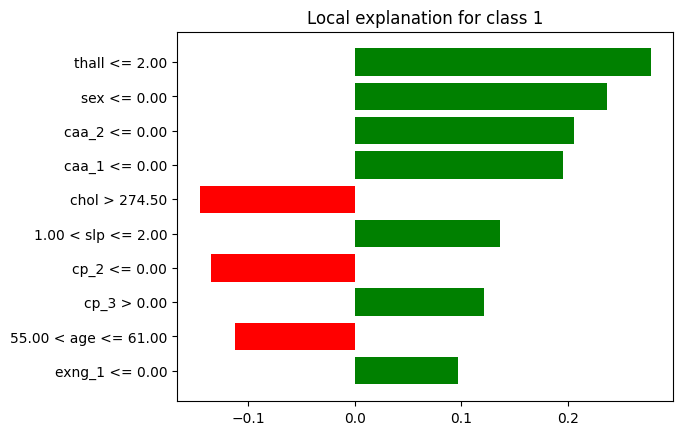

In [10]:
explanation0.plot()

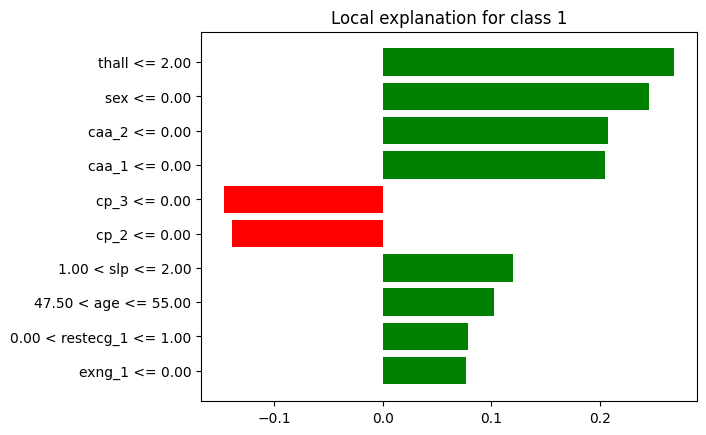

In [11]:
explanation1 = explainer.predict_surrogate(patients.iloc[[1]])
explanation1.plot()

## 3
Comparing LIME for various observations in the dataset

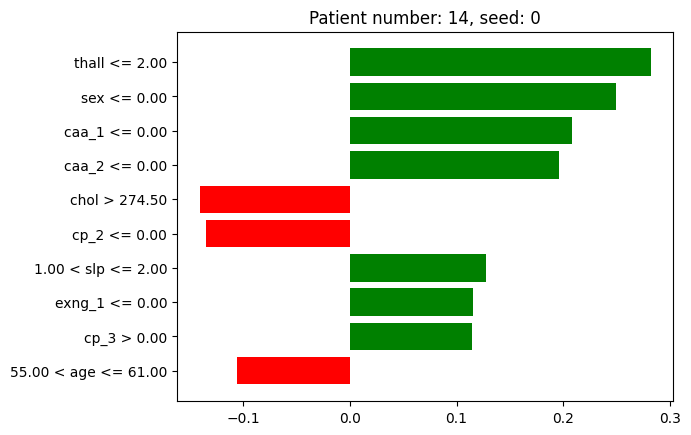

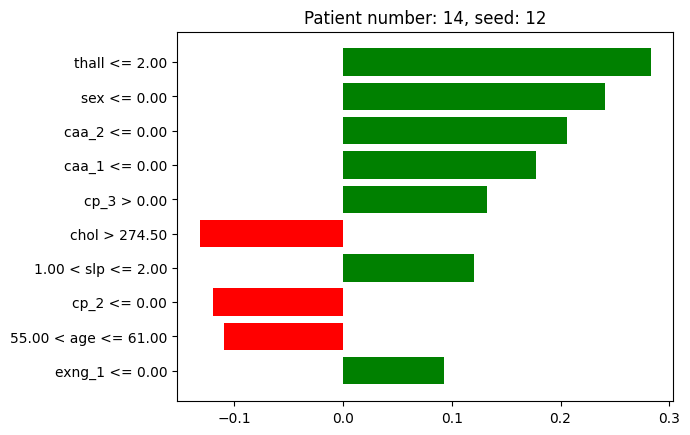

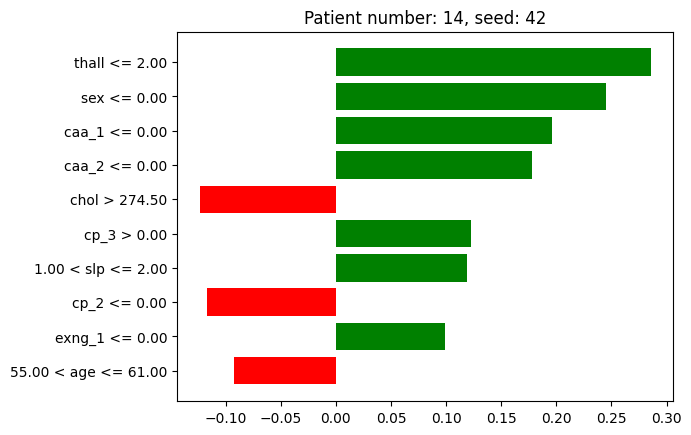

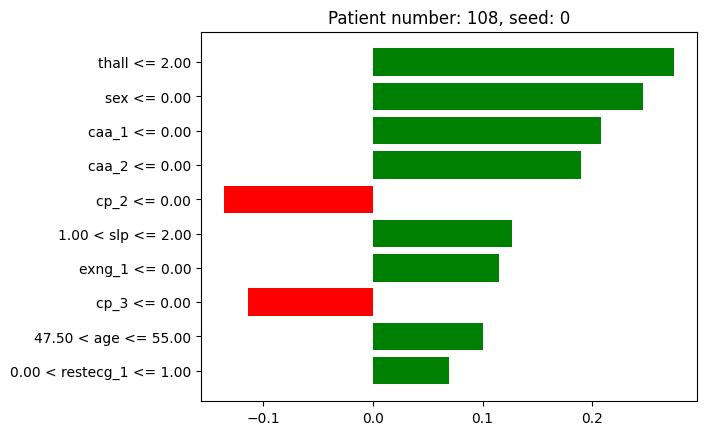

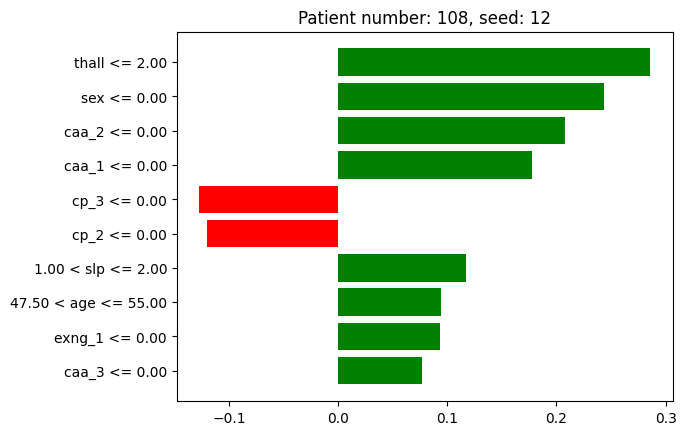

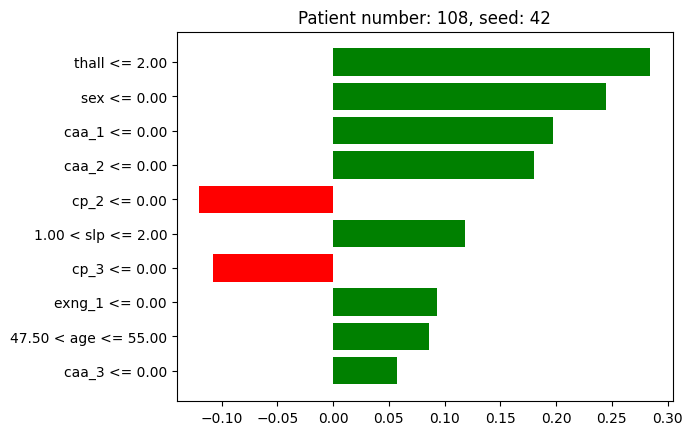

In [12]:
import matplotlib.pyplot as plt
import random
import numpy as np

for idx, obs in patients.iterrows():
    for seed in [0, 12, 42]:
        random.seed(seed)
        np.random.seed(seed)
        expl = explainer.predict_surrogate(obs)
        expl.plot(return_figure=True)
        plt.title(f'Patient number: {idx}, seed: {seed}')
        plt.show()

## 4
Comparing LIME with the explanations obtained using SHAP

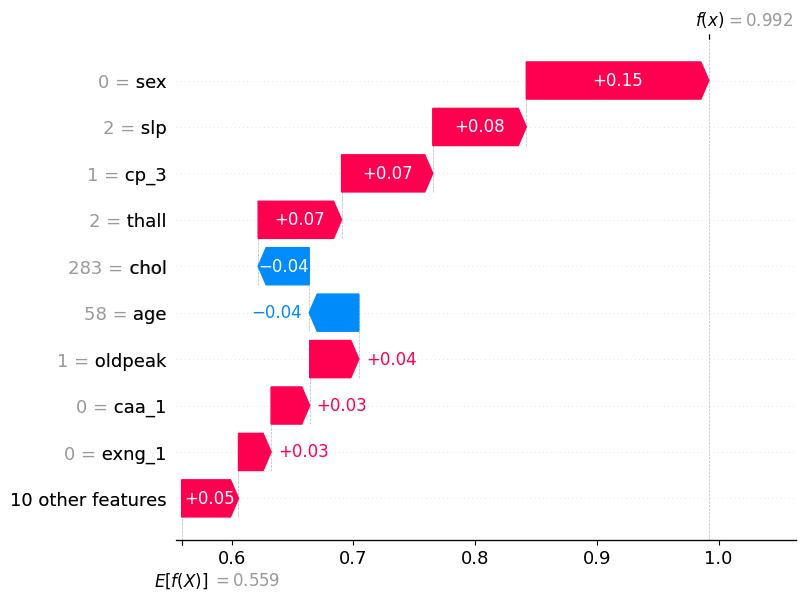

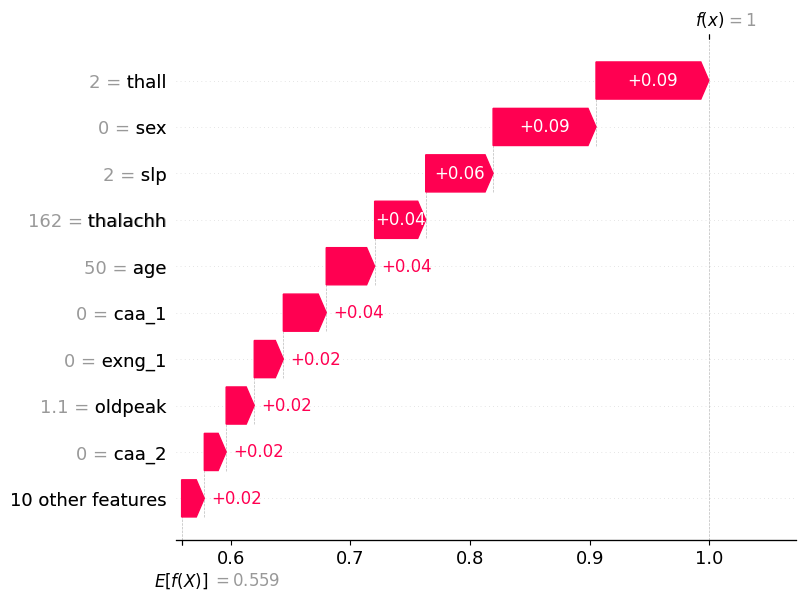

In [13]:
shap_explainer = shap.explainers.Tree(model1, data=X, model_output="probability")
shap_values = shap_explainer(patients)
for i in range(patients.shape[0]):
    shap.plots.waterfall(shap_values[i])

## 5
Comparing LIME between at two different models (XGBClassifier and LogisticRegression)

Preparation of a new explainer is initiated

  -> data              : 303 rows 19 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 303 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LogisticRegression
  -> predict function  : <function yhat_proba_default at 0x7f114afa6050> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00275, mean = 0.545, max = 0.996
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.952, mean = 3.49e-05, max = 0.975
  -> model_info        : package sklearn

A new explainer has been created!


X does not have valid feature names, but LogisticRegression was fitted with feature names


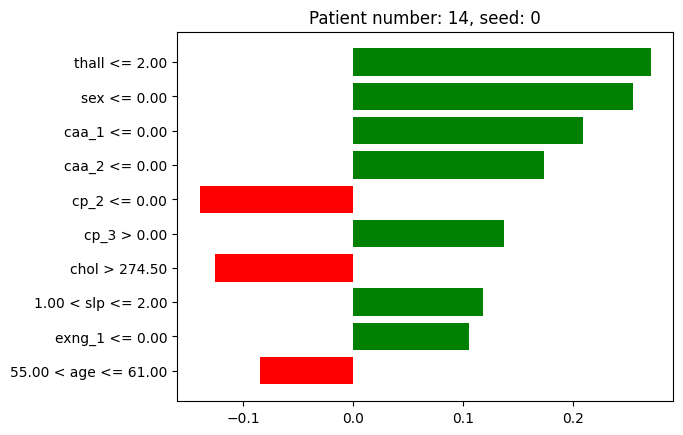

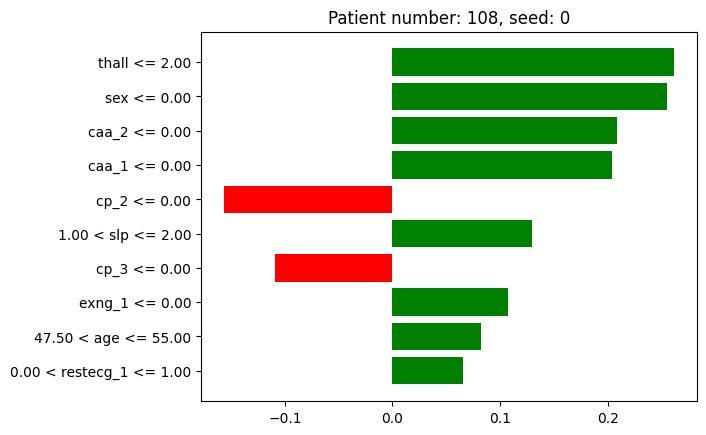

In [14]:
model2 = LogisticRegression(max_iter=1000, random_state=0)
model2.fit(X, y)

explainer2 = dx.Explainer(model2, X, y, label="LogisticRegression")

seed = 0
for idx, obs in patients.iterrows():
    expl = explainer.predict_surrogate(obs)
    expl.plot(return_figure=True)
    plt.title(f'Patient number: {idx}, seed: {seed}')
    plt.show()